# RECOMMANDATION SYSTEM

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
data=pd.read_csv("C:\\Users\\Admin\\Desktop\\DS Assignments\\anime.csv")

In [5]:
data

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


In [6]:
data.describe()

,anime_id,rating,members
count,12294.000000,12064.000000,1.229400e+04
mean,14058.221653,6.473902,1.807134e+04
std,11455.294701,1.026746,5.482068e+04
min,1.000000,1.670000,5.000000e+00
25%,3484.250000,5.880000,2.250000e+02
50%,10260.500000,6.570000,1.550000e+03
75%,24794.500000,7.180000,9.437000e+03
max,34527.000000,10.000000,1.013917e+06


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [8]:
data.isnull().sum().sum()

317

In [9]:
data.isnull().sum()

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

In [10]:
data1=data.dropna()
data1

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


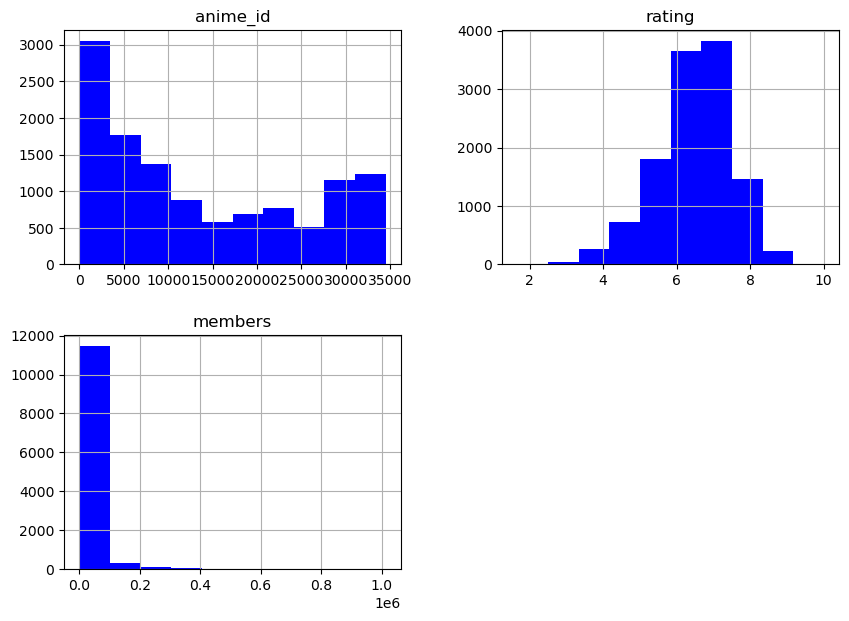

In [11]:
data1.hist(figsize=(10,7),color='blue')
plt.show()

In [12]:
for column in data1.select_dtypes(include=['object']).columns:
    print(f'{column}: {data1[column].nunique()} unique values')

name: 12015 unique values
genre: 3229 unique values
type: 6 unique values
episodes: 187 unique values


In [16]:

from sklearn.feature_extraction.text import CountVectorizer
# Convert genres to a binary matrix
count_vectorizer = CountVectorizer(tokenizer=lambda x: x.split(', '))
genre_matrix = count_vectorizer.fit_transform(data1['genre'])

In [17]:
from sklearn.metrics.pairwise import cosine_similarity
#  the cosine similarity matrix
cosine_sim = cosine_similarity(genre_matrix)
cosine_sim.shape

(12017, 12017)

In [18]:
def recommend_anime(anime_name, cosine_sim=cosine_sim, data1=data1, num_recommendations=5):
    anime_idx = data1[data1['name'] == anime_name].index[0]
    sim_scores = list(enumerate(cosine_sim[anime_idx]))
   # Sort the anime based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
   #  the top similar anime
    sim_scores = sim_scores[1:num_recommendations + 1] 
    anime_indices = [i[0] for i in sim_scores]
    return data1['name'].iloc[anime_indices]


In [19]:
recommended_anime = recommend_anime('Naruto', num_recommendations=5)
recommended_anime

615                                    Naruto: Shippuuden
841                                                Naruto
1103    Boruto: Naruto the Movie - Naruto ga Hokage ni...
1343                                          Naruto x UT
1472          Naruto: Shippuuden Movie 4 - The Lost Tower
Name: name, dtype: object

In [20]:
from sklearn.model_selection import train_test_split

# Simulate user preferences by splitting the dataset into a training  set and a test  set
train_df, test_df = train_test_split(data1, test_size=0.2, random_state=42)
train_df = train_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)

In [23]:
import pandas as pd
from sklearn.metrics import classification_report
from sklearn.preprocessing import MultiLabelBinarizer
ground_truth = pd.DataFrame({
    'anime_id': [1, 2, 3, 4, 5],
    'true_labels': [[1, 2], [1, 3, 4], [2, 5], [3, 4], [1, 5]]})
recommendations = pd.DataFrame({
    'anime_id': [1, 2, 3, 4, 5],
    'recommended': [[2, 3], [4, 5], [1, 5], [2, 3], [1, 2]]})
mlb = MultiLabelBinarizer()
y_true = mlb.fit_transform(ground_truth['true_labels'])
y_pred = mlb.transform(recommendations['recommended'])
y_true_flat = y_true.ravel()
y_pred_flat = y_pred.ravel()

# classification report
report = classification_report(y_true_flat, y_pred_flat)
print(report)


              precision    recall  f1-score   support

           0       0.60      0.64      0.62        14
           1       0.50      0.45      0.48        11

    accuracy                           0.56        25
   macro avg       0.55      0.55      0.55        25
weighted avg       0.56      0.56      0.56        25



# Interview Questions:

# 1.Can you explain the difference between user-based and item-based collaborative filtering?

In [ ]:
In simple words item based collaborative filtering is based on the notion of item similarity. While user based collaborative filtering is based on the notion of user similarity.

# 2. What is collaborative filtering, and how does it work?

In [ ]:
Collaborative filtering is a family of algorithms where there are multiple ways to find similar users or items and multiple ways to calculate rating based on ratings of similar users. Depending on the choices you make, you end up with a type of collaborative filtering approach.